#### Simulations used a tau of 4, max pop size fold change of 3, 5e4 time steps

In [10]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)

## Population size time series

In [11]:
flst <- naturalsort(list.files('~/jackgl/test_brain_th10_0823/')) # File names are same for each directory (lung, colon, brain)
res <- array(0,dim=c(5,5))

In [12]:
dataDir <- '~/jackgl/test_brain_th10_0823/'
Ns <- array(NA,dim=c(20,5e4))
j <- 1
for (i in 1:20) {
    load(paste0(dataDir,flst[i]))
#     N[N==0] <- NA
    Ns[i,] <- N
    j <- j+1
}

In [13]:
Nstmp <- array(NA,dim=c(4,5e4))
for (i in 1:4) {
    Nstmp[i,] <- apply(Ns[(5*(i-1)+1):(5*i),],2,median)
}
Ns <- Nstmp

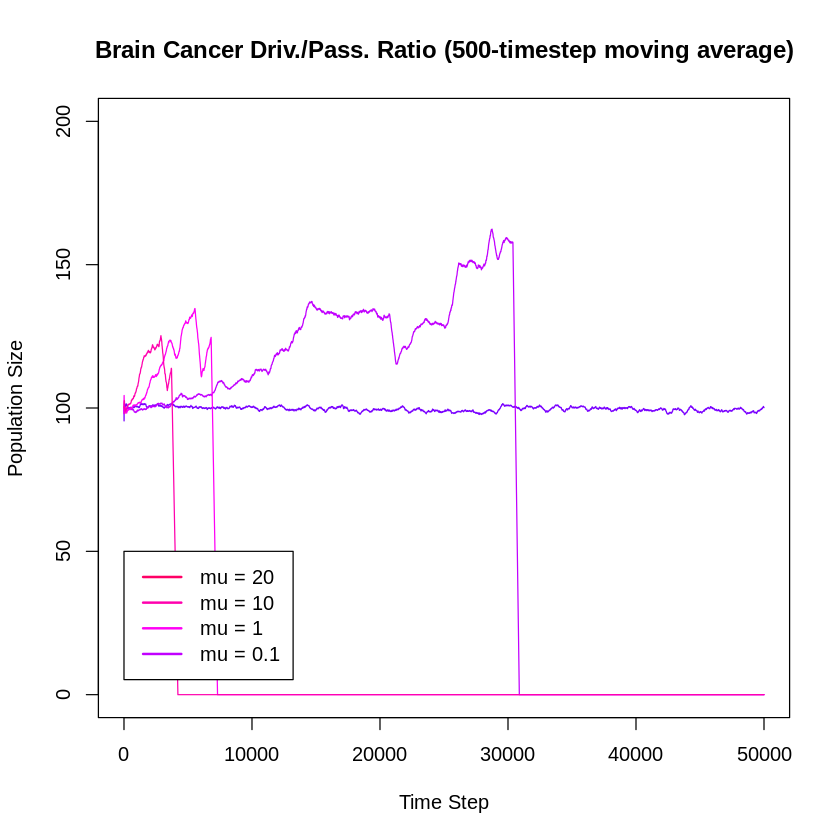

In [14]:
# plot(1:length(Ns[[1]]),Ns[[1]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
# for (i in 2:5) {lines(1:length(Ns[[i]]),Ns[[i]],type='l',xlab='Timestep',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}

plot(1:length(Ns[1,]),movavg(Ns[1,],500,'s'),type='l',main='Brain Cancer Driv./Pass. Ratio (500-timestep moving average)',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[1*40])
for (i in 2:4) {lines(1:length(Ns[i,]),movavg(Ns[i,],500,'s'),type='l',xlab='Time Step',ylab='Population Size',ylim=c(0,200),col=cols[i*40])}
legend(0,50,legend=c("mu = 20","mu = 10","mu = 1","mu = 0.1"),lty=1,lwd=2,col = cols[c(200,160,120,80)])

mu is the L1 insertion rate per cell cycle (unique to each cell; proportional to birth rate)

In [15]:
dataDir <- '~/jackgl/test_brain_th10_0823/'
Ns <- array(0,dim=c(4,5e4))
mui <- 2
for (i in 1:4) {
    tmp <- array(0,dim=c(5,5e4))
    for (j in 1:5) {
        load(paste0(dataDir,flst[((i-1)*20)+(5*(mui-1))+(j-1)+1]))
#         print(flst[((i-1)*20)+(5*(mui-1))+(j-1)+1])
#         print(head(N))
        N[N==0] <- NA
        tmp[j,] <- N
    }
    Ns[i,] <- apply(tmp,2,median)
}


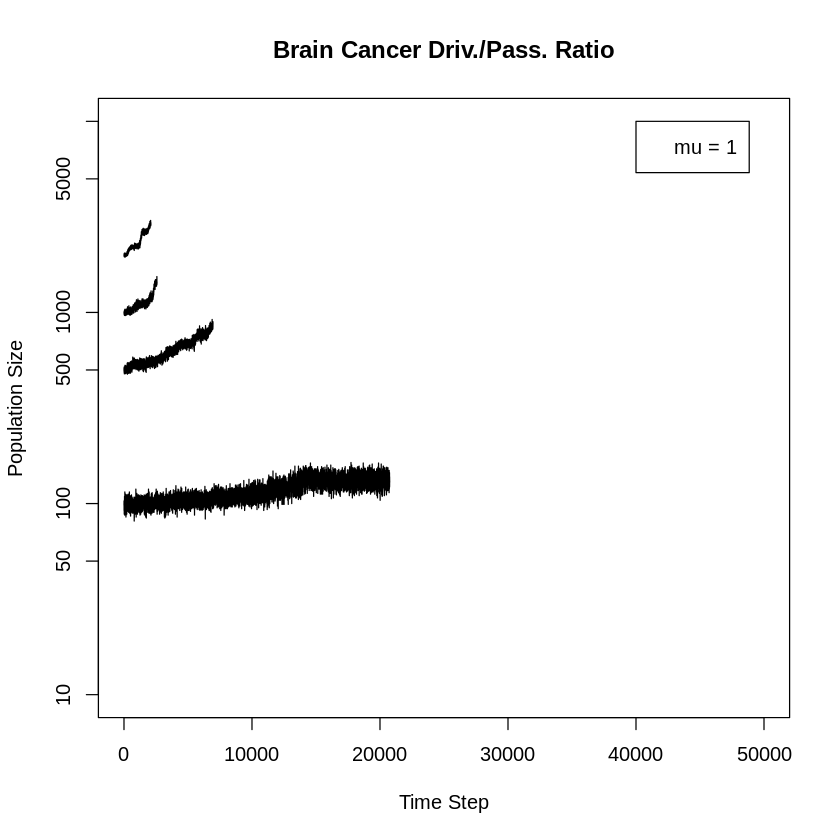

In [16]:
plot(1:length(Ns[1,]),Ns[1,],type='l',main='Brain Cancer Driv./Pass. Ratio',xlab='Time Step',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:4) {lines(1:length(Ns[i,]),Ns[i,],type='l',xlab='Time Step',ylab='Population Size')}
legend(40000,10000,legend=c("mu = 1"),lty=0)

## Heat maps

In [17]:
dataDir <- '~/jackgl/test_brain_th10_0823/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(0,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            #N <- movavg(N,500,'s')
            if (max(N)>=3*N[1]) {tmp[k] <- max(N)/N[1]}
            else {tmp[k] <- tail(N,n=1)/N[1]}
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}
# res
# res[2,4]

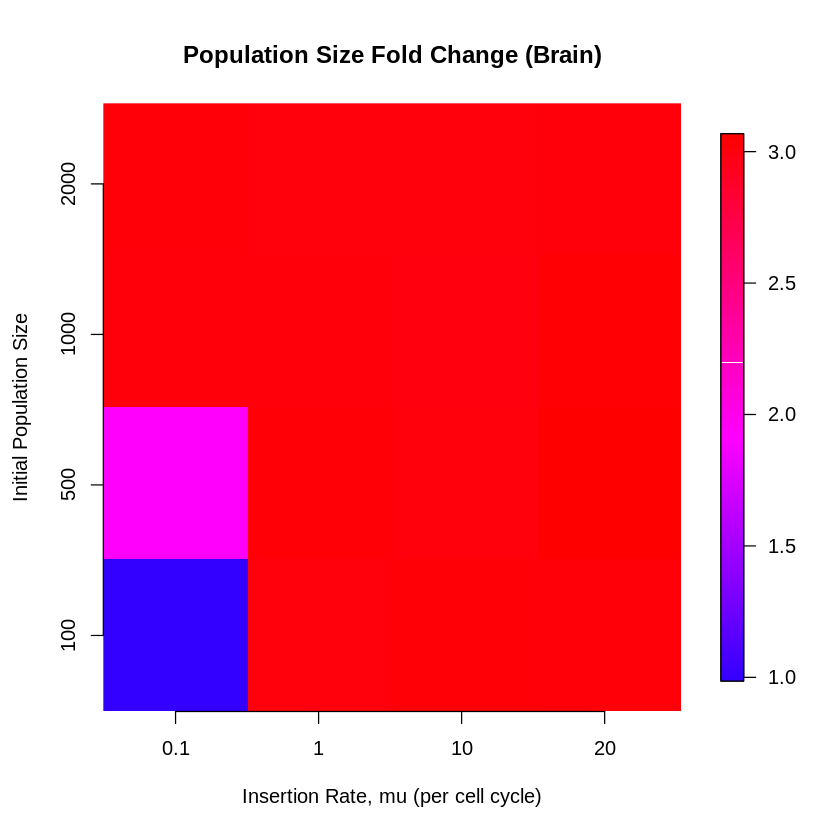

In [18]:
image.plot(t(res),axes=F,col=cols)
title(main="Population Size Fold Change (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,2e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [38]:
dataDir <- '~/jackgl/test_brain_th10_0823/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(0,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            #N <- movavg(N,500,'s')
            tmp[k] <- Pop$nd[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}
# res
# res[2,4]

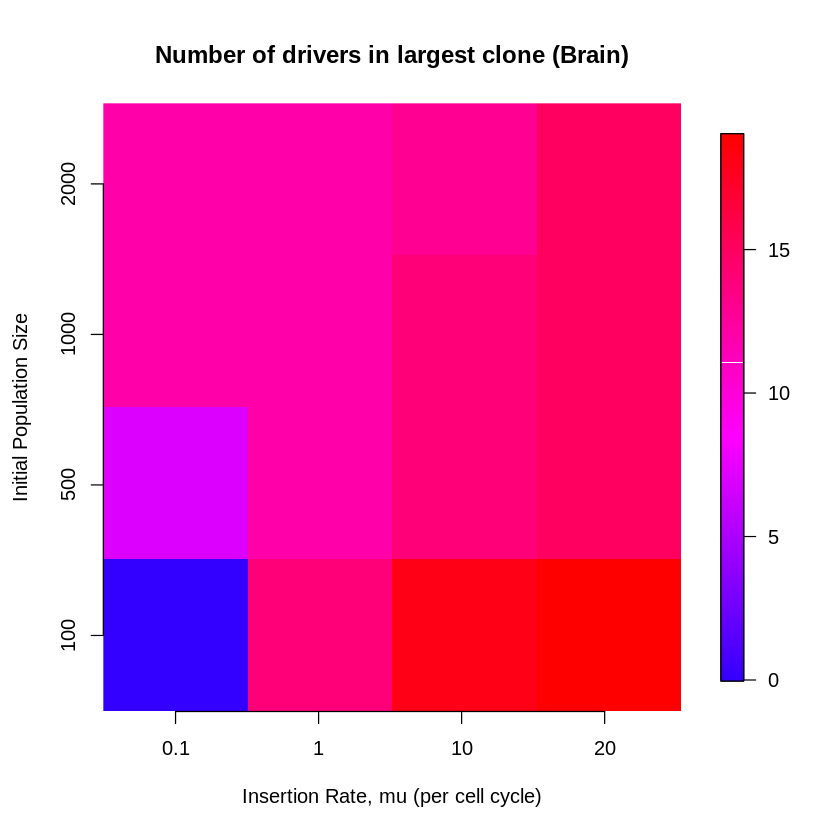

In [39]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of drivers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,2e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 

In [40]:
dataDir <- '~/jackgl/test_brain_th10_0823/'
flst <- naturalsort(list.files(dataDir))
res <- matrix(0,nrow=4,ncol=4)
simc <- 1
for (n0 in 1:4) {
    for (mu in 1:4) {
        tmp <- array(0,dim=c(5,1))
        for (k in 1:5) {
            load(paste0(dataDir,flst[simc]))
            #N <- movavg(N,500,'s')
            tmp[k] <- Pop$np[1]
            simc <- simc+1
        }
        res[n0,mu] <- median(tmp)
        
    }
}
# res
# res[2,4]

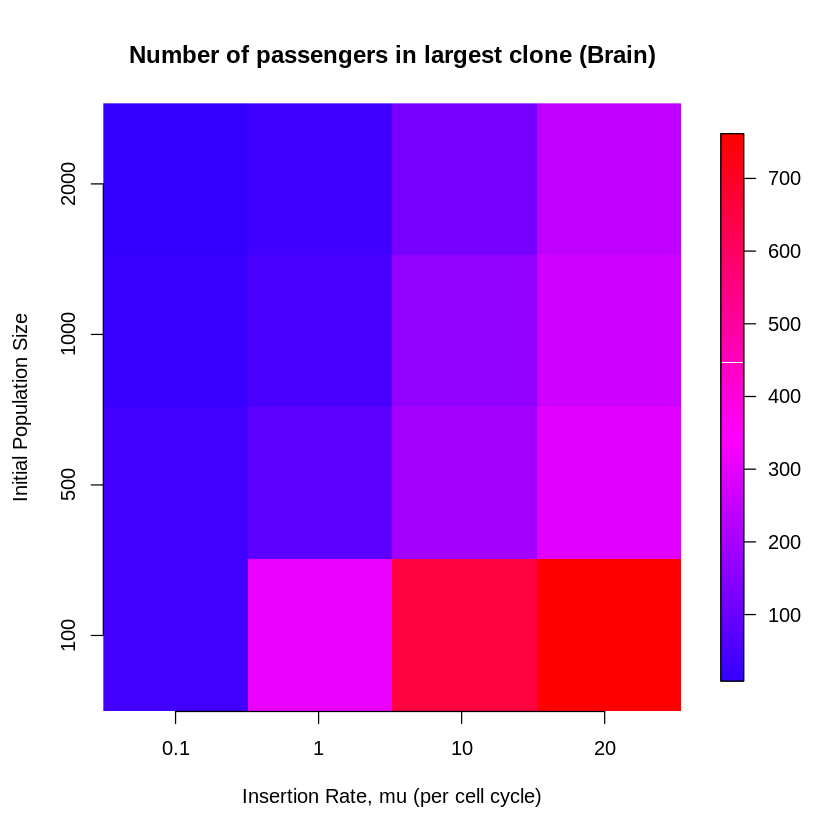

In [42]:
image.plot(t(res),axes=F,col=cols)
title(main="Number of passengers in largest clone (Brain)",xlab='Insertion Rate, mu (per cell cycle)',ylab='Initial Population Size');
axis(1, at=seq(0,1,0.33), labels=c(1e-1,1e0,1e1,2e1)); 
axis(2, at=seq(0,1,0.33), labels=c(1e2,5e2,1e3,2e3)); 